# Graficar Assets Results

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cbook as cbook

In [61]:
datos = pd.read_csv('../datasets/OtherAssetsCSV/assets_results.csv', index_col='index')
datos.drop(columns=['Unnamed: 0'], inplace=True)
datos['nombre'] = ['S&P 500', 'Bitcoin', 'Oro', 'Bonos 1Y', 'Bonos 3M', 
                   'Bonos 10Y', 'Bonos 30Y', 'Euro', 'IPC', 'Arte']
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, sp_500 to art
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   returns     10 non-null     float64
 1   volatility  10 non-null     float64
 2   sharpe      10 non-null     float64
 3   nombre      10 non-null     object 
dtypes: float64(3), object(1)
memory usage: 400.0+ bytes


In [66]:
datos.values[0]

array([8.982759834996347, 0.1843444699483963, 0.4864368232747389,
       'S&P 500'], dtype=object)

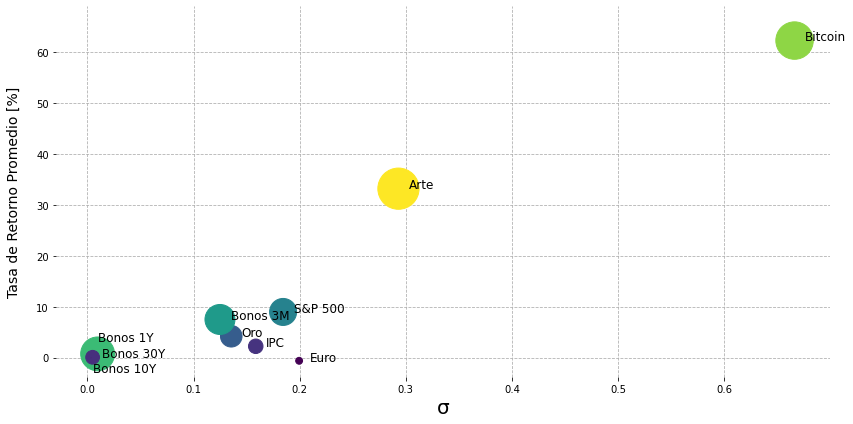

In [89]:
fig, ax = plt.subplots(figsize=(12,6))

ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.bottom.set_visible(False)
ax.spines.left.set_visible(False)


ax.scatter(datos.volatility, datos.returns, s=np.absolute(datos.sharpe)*1500, c=datos.sharpe, zorder=3)

ax.grid(True, ls='--', zorder=-2)
ax.set_xlabel('σ', fontsize=20)
ax.set_ylabel('Tasa de Retorno Promedio [%]', fontsize=14, labelpad=15)

for valor in datos.values:
    if valor[3] == 'Bonos 10Y':
        ax.text(x=valor[1], y=valor[0]-3, s=valor[3], fontsize=12)
    elif valor[3] == 'Bonos 1Y':
        ax.text(x=valor[1], y=valor[0]+2.5, s=valor[3], fontsize=12)
        
    else:   
        ax.text(x=valor[1]+.01, y=valor[0], s=valor[3], fontsize=12)

ax.set_ylim(None, 69)
fig.tight_layout()
fig.savefig('../datasets/images/grafica_desviaciones_retorno.jpeg', dpi=170)

plt.show()

In [19]:
close

array([406420.9442, 422001.3776, 415614.5025, 446852.9125, 454630.8722,
       453704.3668, 454700.638 , 460361.7171, 470713.6227, 495387.83  ,
       494208.9559, 505350.2375, 513027.2935, 547114.6324, 543203.8222,
       509694.864 , 448697.6466, 415737.7218, 426048.1445, 432030.3104,
       402075.6005, 401683.4022, 394028.9015, 412782.7392, 425222.9604,
       453389.    , 453013.2   , 454525.036 , 472197.4686, 481452.75  ,
       492723.    , 470944.0453, 464072.5696, 483878.8323, 499108.428 ,
       511124.9013, 514381.5358, 503382.048 , 499335.9   , 483273.9555,
       474354.3996, 460430.24  , 453945.636 , 456689.6277, 473010.0927,
       486206.0172, 487000.3427, 496870.0516, 495472.2318, 495234.4729,
       483047.1836, 474747.5953, 469629.2358, 446556.33  , 424570.545 ,
       412487.04  , 411542.128 , 417147.3173, 410203.275 , 425728.3548,
       411858.135 , 387414.0715, 372946.4004, 365168.09  , 328422.2305,
       307616.7202, 321025.012 , 335201.184 , 317447.9006, 30854

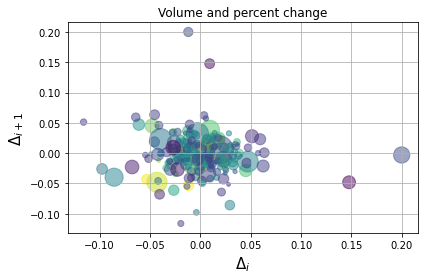

In [11]:
# Load a numpy record array from yahoo csv data with fields date, open, high,
# low, close, volume, adj_close from the mpl-data/sample_data directory. The
# record array stores the date as an np.datetime64 with a day unit ('D') in
# the date column.
price_data = (cbook.get_sample_data('goog.npz', np_load=True)['price_data']
              .view(np.recarray))
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()